<a href="https://colab.research.google.com/github/LatiefDataVisionary/customer-segmentation-strategy/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation Analysis Project**

**Project By:** Lathif Ramadhan

## **Dataset**

- **Name:** Customer Segmentation
- **Source:** Kaggle (vetrirah/customer)
- **Link:** https://www.kaggle.com/datasets/vetrirah/customer
- **Description:** This dataset contains information about customers, including demographics, lifestyle, and spending habits, aiming to identify distinct customer groups for targeted marketing strategies.

## **Project Overview**

This end-to-end data science project focuses on performing a comprehensive customer segmentation analysis using the provided dataset. The project aims to achieve two main goals:

1.  **Supervised Classification:** Build and evaluate classification models (SVC, Decision Tree, Naive Bayes) to predict the existing `Segmentation` labels in the dataset.
2.  **Unsupervised Clustering:** Apply clustering algorithms (K-Means, DBSCAN) to identify natural customer groups based on their attributes, without using the existing `Segmentation` labels.

The project will follow a structured approach, including:

*   **Data Loading and Initial Exploration (EDA):** Loading the data, understanding its structure, checking for missing values and duplicates, and performing initial visualizations.
*   **Data Preprocessing:** Handling missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.
*   **Supervised Modeling:** Training and evaluating classification models to predict the `Segmentation` column.
*   **Unsupervised Clustering:** Applying clustering techniques to discover underlying customer segments.
*   **Interpretation and Findings:** Analyzing and interpreting the results from both classification and clustering approaches.
*   **Conclusion and Recommendations:** Summarizing key findings and providing actionable business recommendations for marketing strategies.
*   **Code Refactoring and Documentation:** Ensuring the notebook is clean, well-commented, and structured for a professional portfolio.

This notebook serves as a step-by-step guide through the entire process, demonstrating best practices in data analysis and machine learning.

## **Phase 1: Setup and Initial Data Exploration**

**Objective:** Prepare the working environment, load the data, and perform initial checks to understand the data structure and quality.

### **Task 1.1 - Import Libraries**

First, we need to import all the necessary Python libraries that will be used throughout the project. We'll need `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` and `seaborn` for visualization, and `train_test_split` from `sklearn.model_selection` for splitting data later.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import joblib
import os

### **Task 1.2 - Load Data**

Next, we will load the `Train.csv` dataset into a Pandas DataFrame named `df`. Based on the previous execution output, the file is located at `/root/.cache/kagglehub/datasets/vetrirah/customer/versions/1/Train.csv`. We will use this path to read the data.

In [183]:
# Task 1.2 - Load Data
# Using the path found from previous execution
path = "https://raw.githubusercontent.com/LatiefDataVisionary/customer-segmentation-strategy/refs/heads/main/data/processed/Train.csv"
df = pd.read_csv(path)

### **Task 1.3 - Initial Inspection**

Once the data is loaded, it's crucial to perform an initial inspection to understand the data structure, data types of each column, presence of missing values, and a statistical summary. This will give us an overview of the data's "health" before proceeding with further preprocessing. We will use the `.head()`, `.info()`, `.describe()`, `.isnull().sum()`, and `.duplicated().sum()` methods for this.

In [184]:
# Display the first 5 rows
display(df.head())

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [185]:
# Display summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [186]:
# Display descriptive statistics
display(df.describe(include='all'))

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.000000,8068,7928,8068.000000,7990,7944,7239.000000,8068,7733.000000,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
std,2595.381232,NaN,NaN,16.711696,NaN,NaN,3.406763,NaN,1.531413,NaN,NaN
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25%,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
50%,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
75%,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN


In [187]:
# Count and display missing values per column
display(df.isnull().sum())

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [188]:
# Check for duplicated rows
display(df.duplicated().sum())

np.int64(0)

In [189]:
# Inspect Unique Values in Each Column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': \n\t{unique_values}\n")

Unique values in column 'ID': 
	[462809 462643 466315 ... 465406 467299 461879]

Unique values in column 'Gender': 
	['Male' 'Female']

Unique values in column 'Ever_Married': 
	['No' 'Yes' nan]

Unique values in column 'Age': 
	[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

Unique values in column 'Graduated': 
	['No' 'Yes' nan]

Unique values in column 'Profession': 
	['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Unique values in column 'Work_Experience': 
	[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]

Unique values in column 'Spending_Score': 
	['Low' 'Average' 'High']

Unique values in column 'Family_Size': 
	[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]

Unique values in column 'Var_1': 
	['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Ca

## **Phase 2: Exploratory Data Analysis (EDA)**

**Objective:** Delve deeper into the data using visualizations to uncover patterns, relationships, and anomalies. For each plot, provide the code and a brief interpretation of what we observe.

### **Task 2.1 - Target Variable Analysis**

Let's start by analyzing the distribution of our target variable, `Segmentation`. By looking at the count of observations in each segment, we can understand if our dataset has a balanced or imbalanced class distribution. This is important to consider when building classification models later.

/tmp/ipython-input-3107536590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segmentation', palette='viridis')


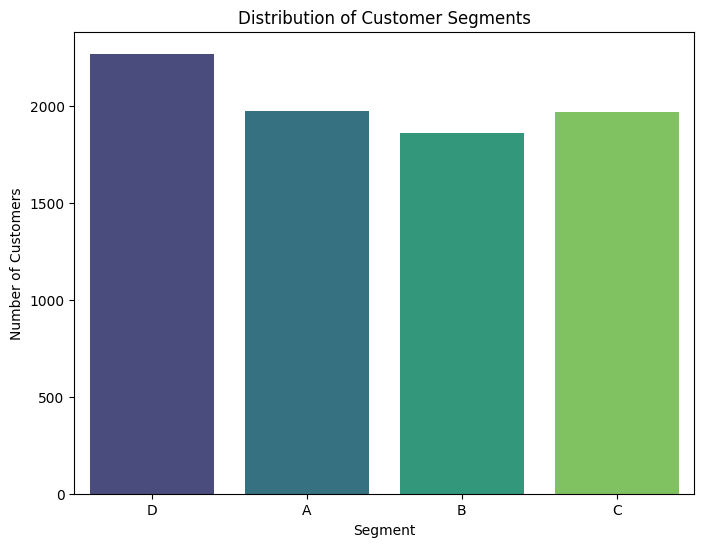

In [190]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Segmentation', palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

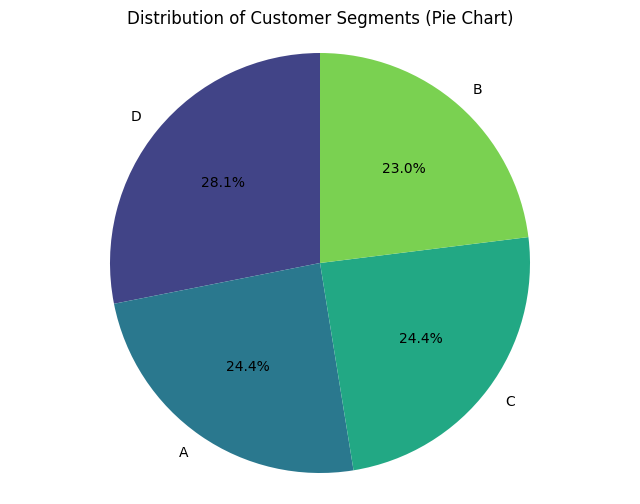

In [191]:
# Calculate the counts of each segment
segment_counts = df['Segmentation'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(x=segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [192]:
# Calculate the percentage of each segment
segment_percentages = df['Segmentation'].value_counts(normalize=True) * 100

# Create a DataFrame to display the distribution
segment_distribution_table = pd.DataFrame({
    'Count': segment_counts,
    'Percentage (%)': segment_percentages
})

# Sort the table by count in descending order
segment_distribution_table = segment_distribution_table.sort_values(by='Count', ascending=False)

print("Distribution of Customer Segments:")
display(segment_distribution_table)

Distribution of Customer Segments:


,Count,Percentage (%)
Segmentation,,
D,2268,28.111056
A,1972,24.442241
C,1970,24.417452
B,1858,23.029251


### **Task 2.2 - Univariate Analysis**

Next, we will examine the distribution of each variable individually. For categorical variables, we will use countplots to see the frequency of each category. For numerical variables, we will use histograms to see the shape of their distribution (normal, skewed, etc.) and boxplots to identify potential outliers.

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


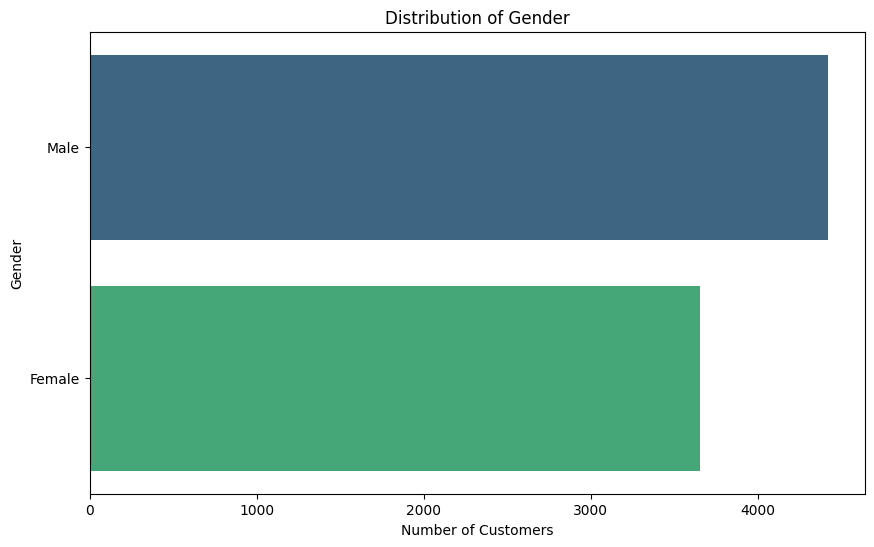

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


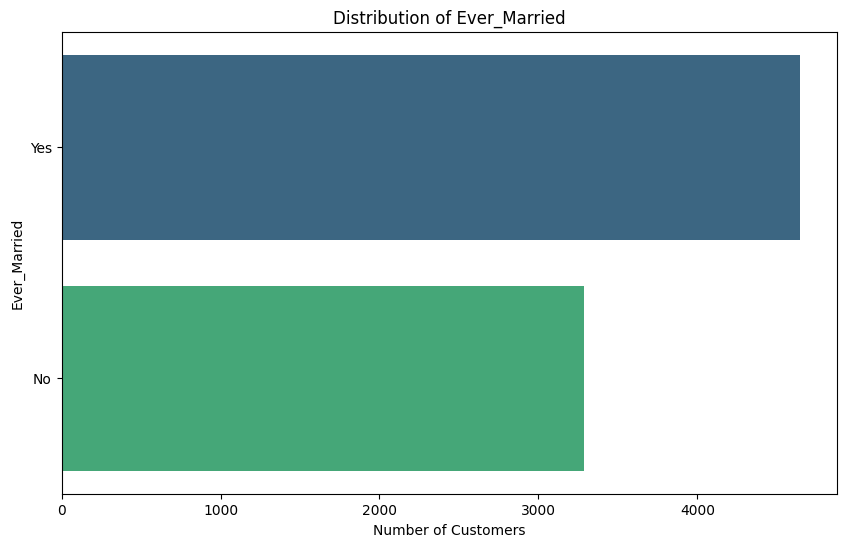

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


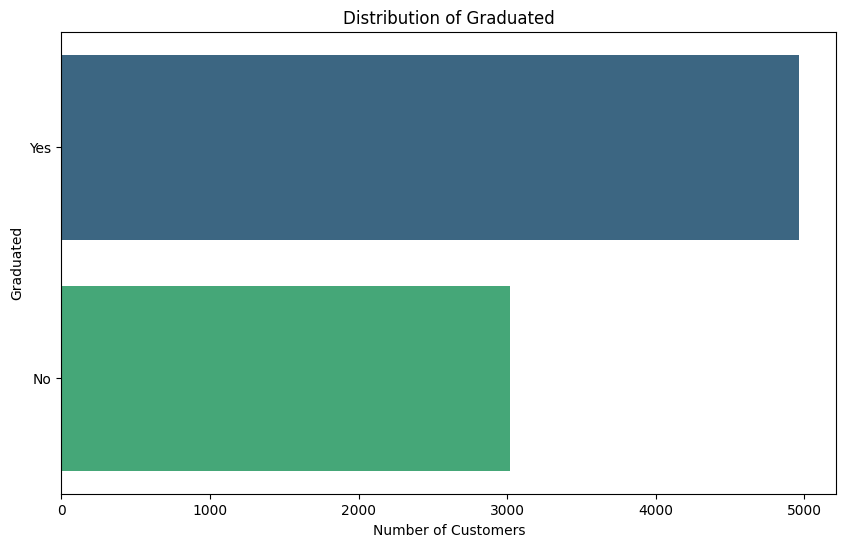

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


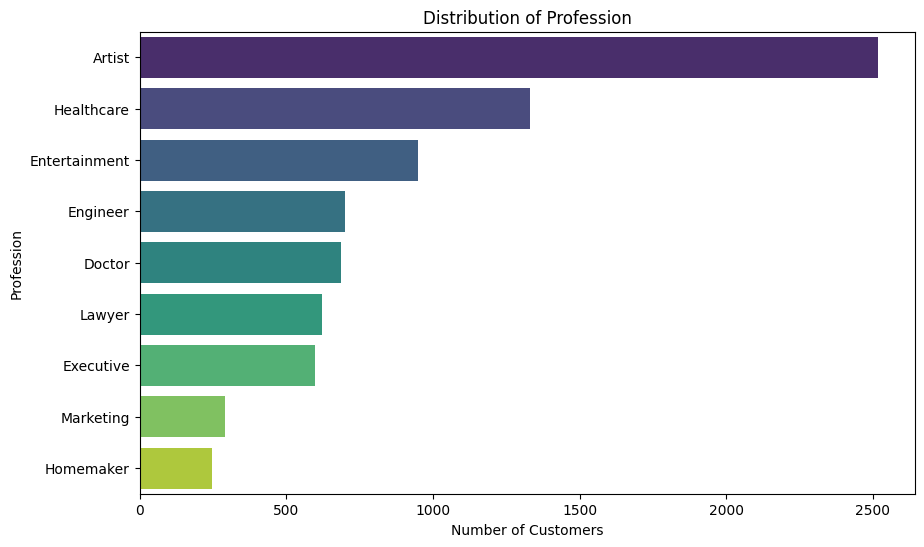

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


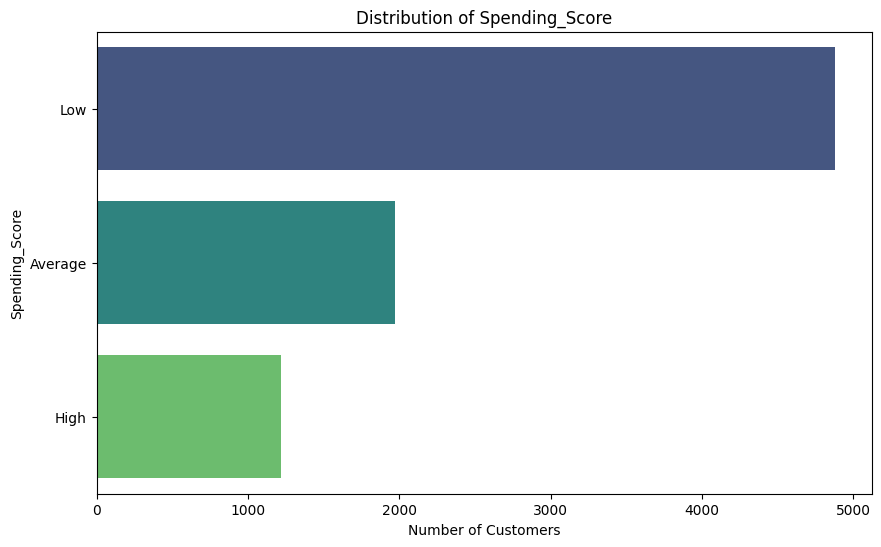

/tmp/ipython-input-2324813993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)


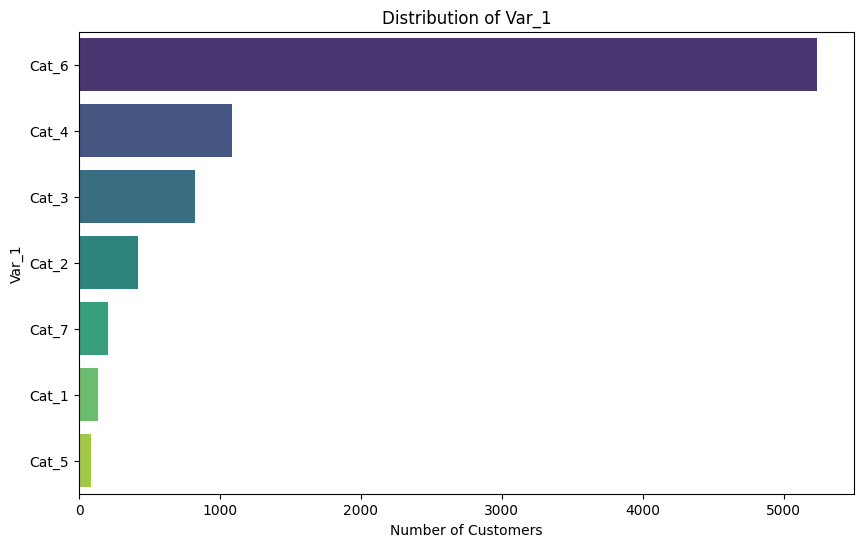

In [193]:
# Categorical Variables
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Number of Customers')
    plt.ylabel(col)
    plt.show()

/tmp/ipython-input-3107962338.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


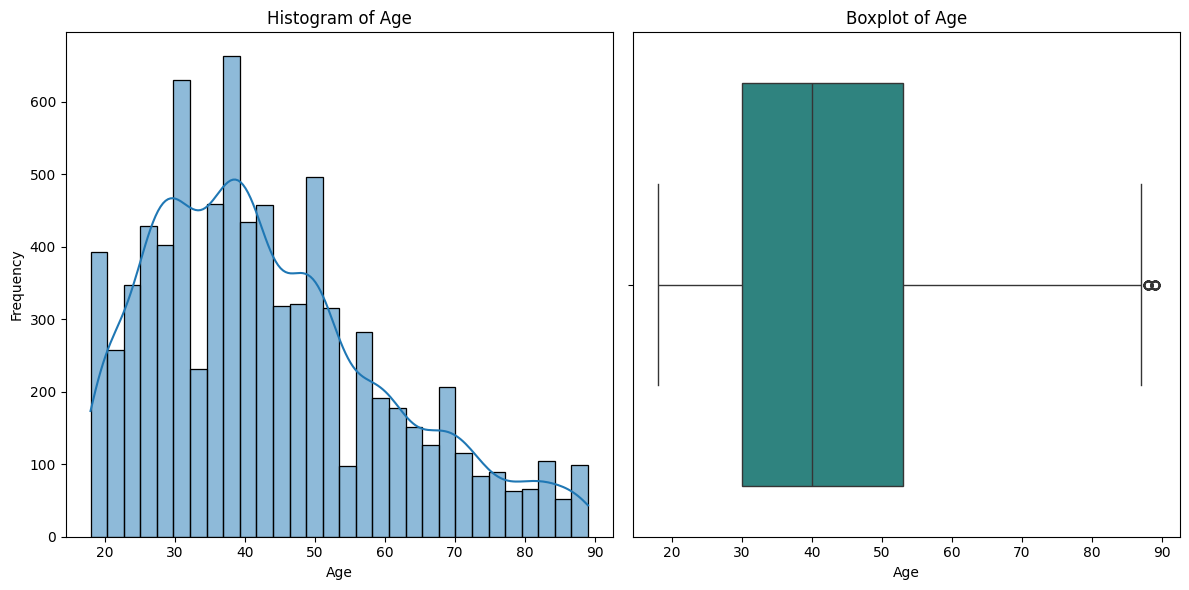

/tmp/ipython-input-3107962338.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


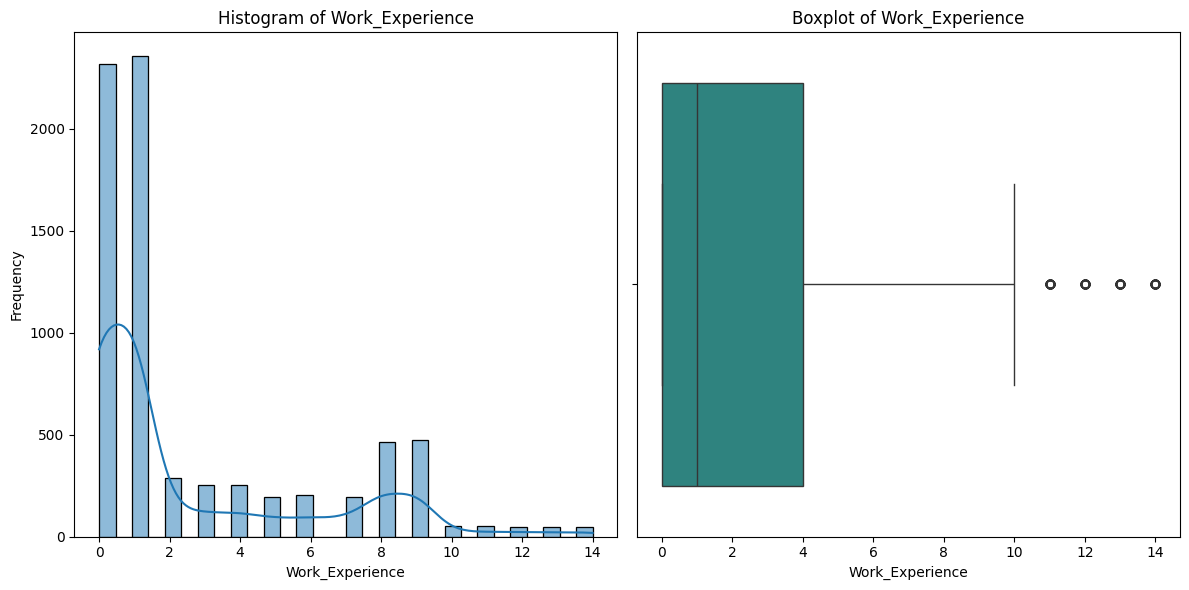

/tmp/ipython-input-3107962338.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


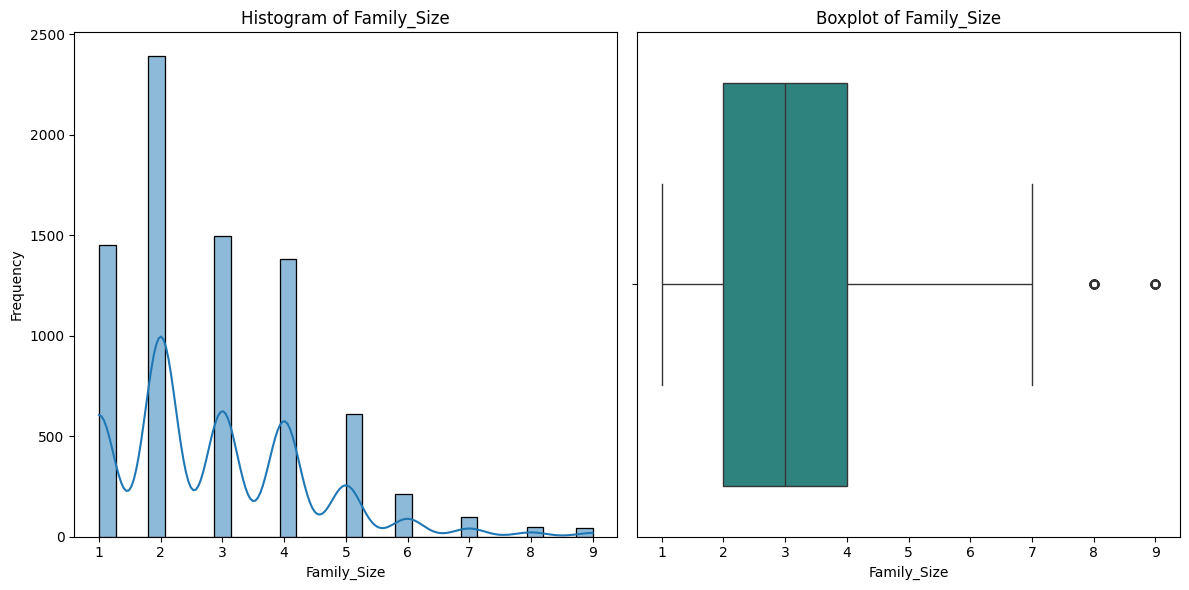

In [194]:
# Numerical Variables
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### **Task 2.3 - Bivariate Analysis (Relationship with Target)**

After understanding the distribution of each variable, we will look at how these variables relate to our target variable `Segmentation`. This will help us identify features that might be most influential in predicting or grouping customers. We will use countplots with `hue` for categorical variables and boxplots/violinplots for numerical variables.

#### **Task 2.3.1 Categorical vs Target**

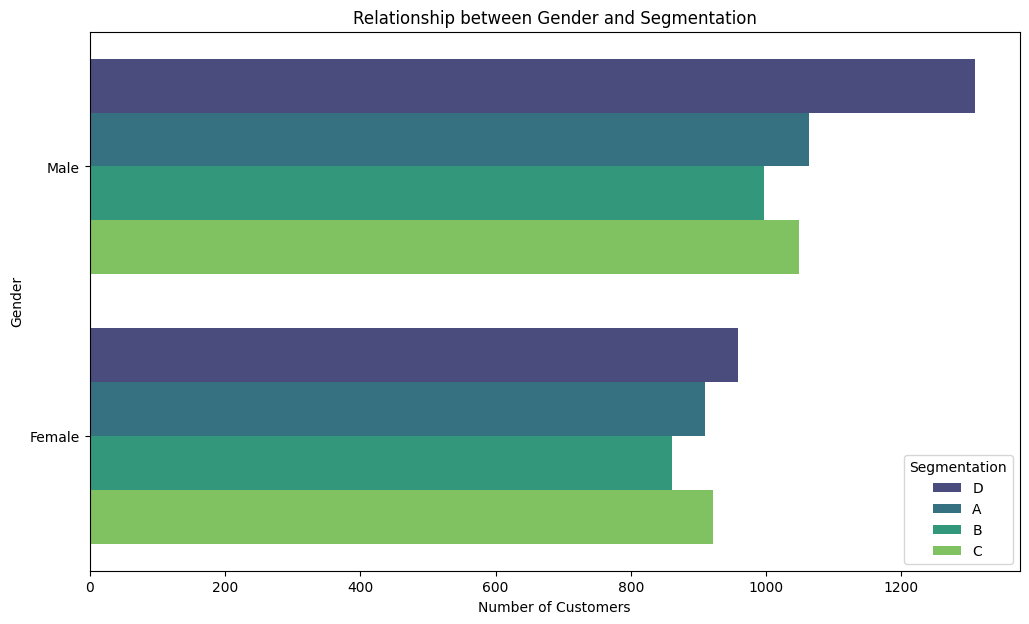

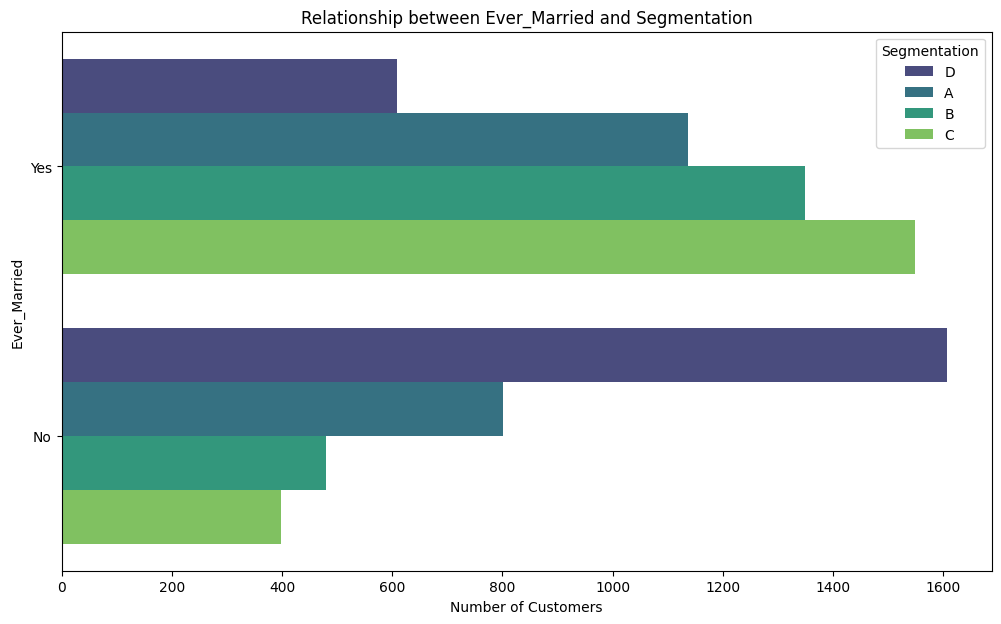

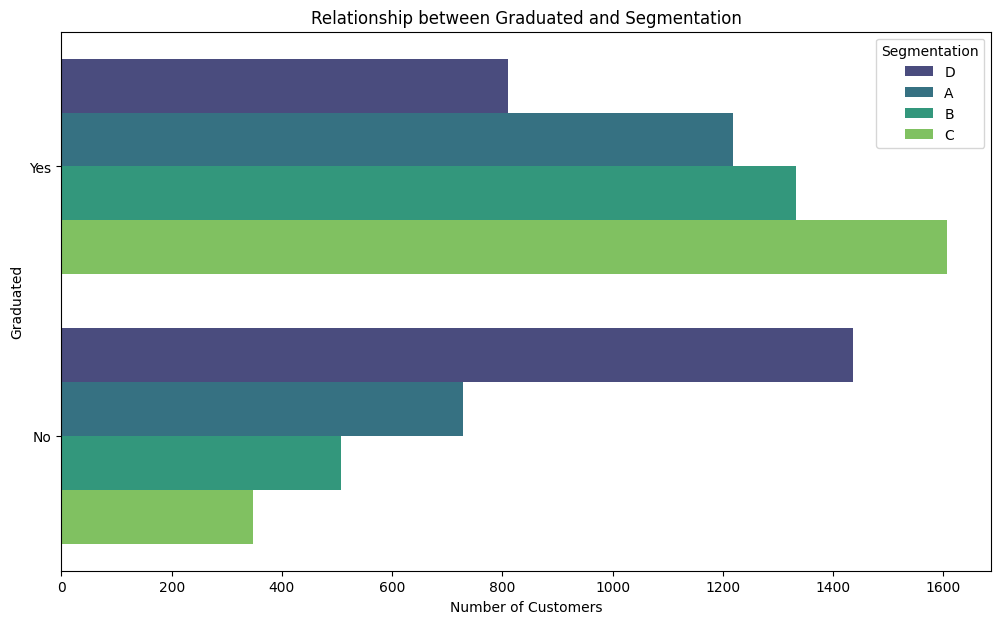

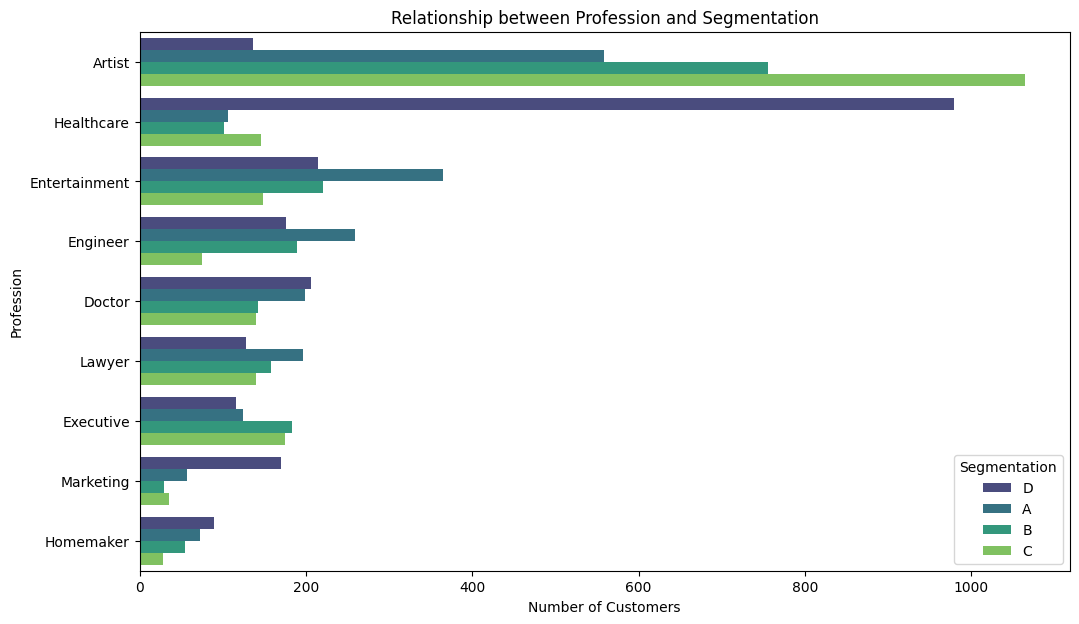

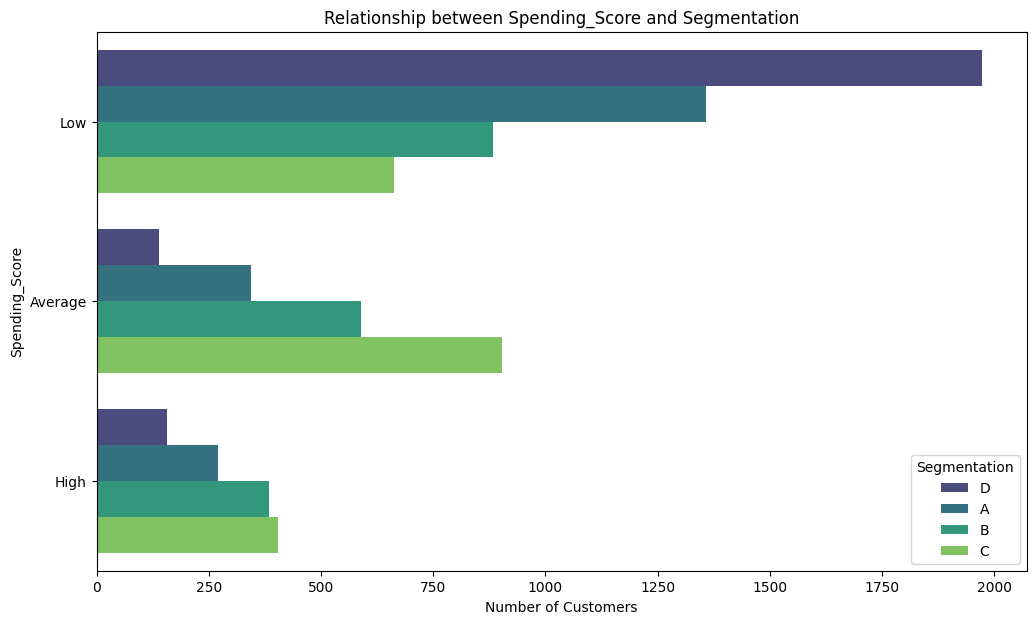

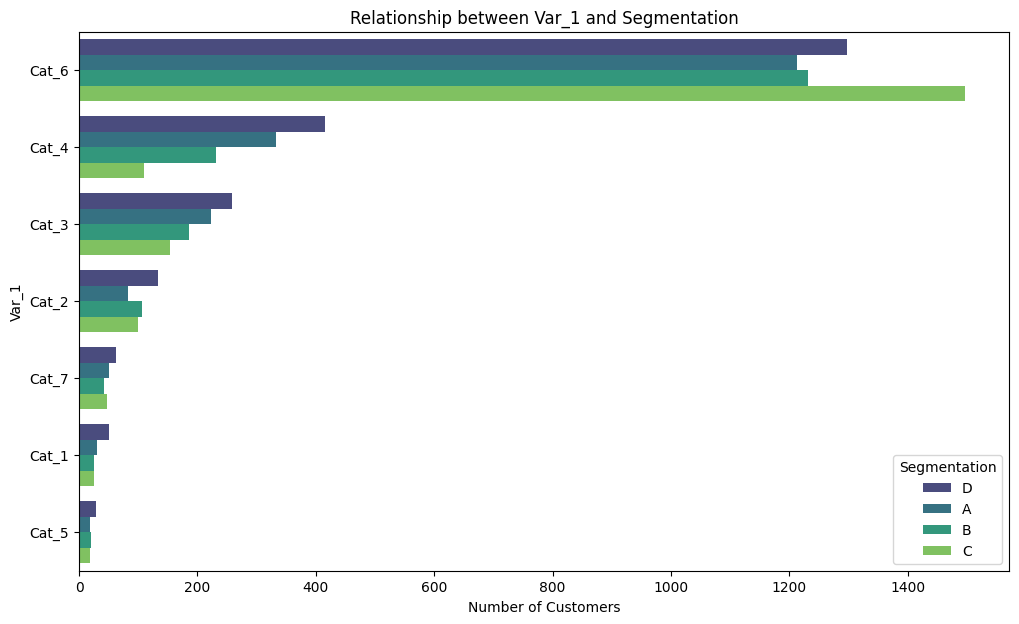

In [195]:
for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, y=col, hue='Segmentation', palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Relationship between {col} and Segmentation')
    plt.xlabel('Number of Customers')
    plt.ylabel(col)
    plt.legend(title='Segmentation')
    plt.show()

#### **Task 2.3.1 Numerical vs Target**

/tmp/ipython-input-3244861991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')


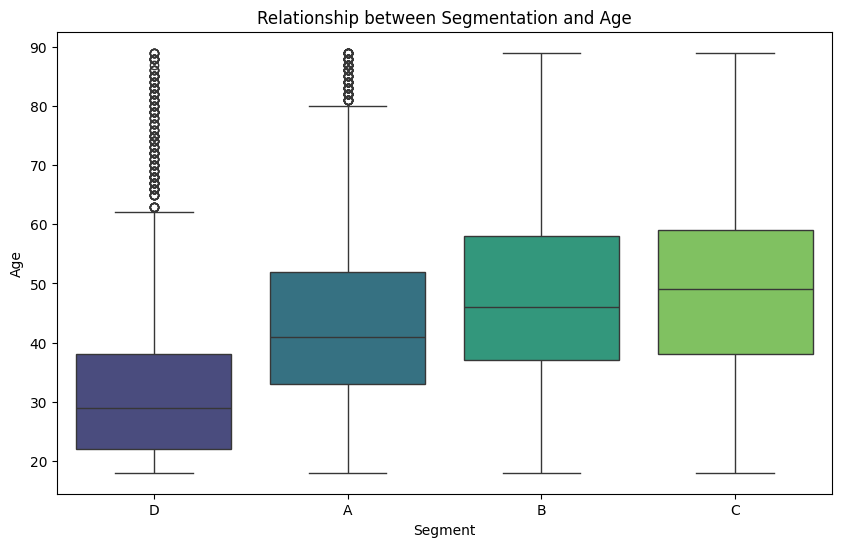

/tmp/ipython-input-3244861991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')


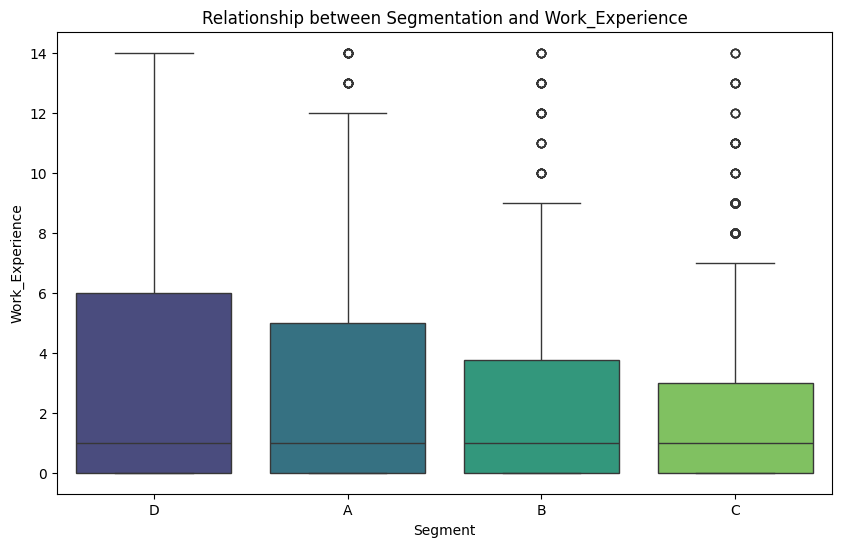

/tmp/ipython-input-3244861991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')


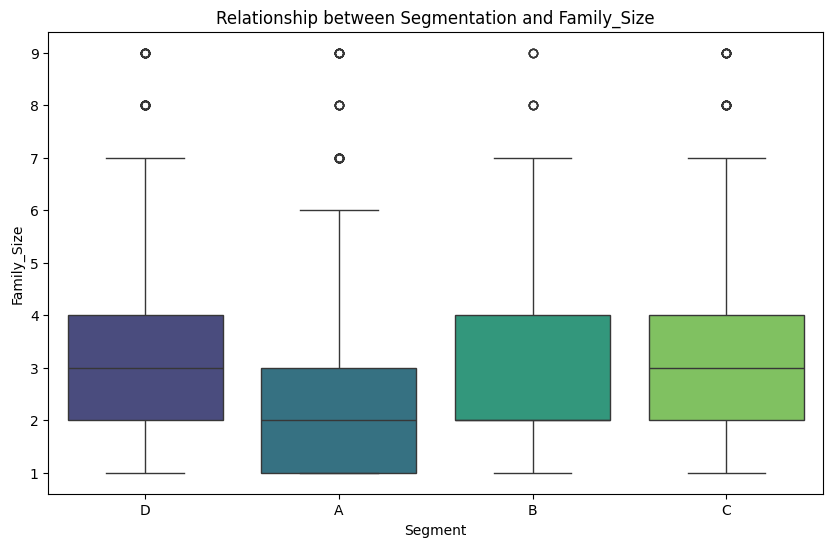

In [196]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Segmentation', y=col, palette='viridis')
    plt.title(f'Relationship between Segmentation and {col}')
    plt.xlabel('Segment')
    plt.ylabel(col)
    plt.show()

### **Task 2.4 - Multivariate Analysis**

Finally, we will look at the relationships between numerical variables using a heatmap of the correlation matrix. This helps us detect multicollinearity, which is when two or more numerical features are highly correlated. Multicollinearity can affect the performance of some machine learning models.

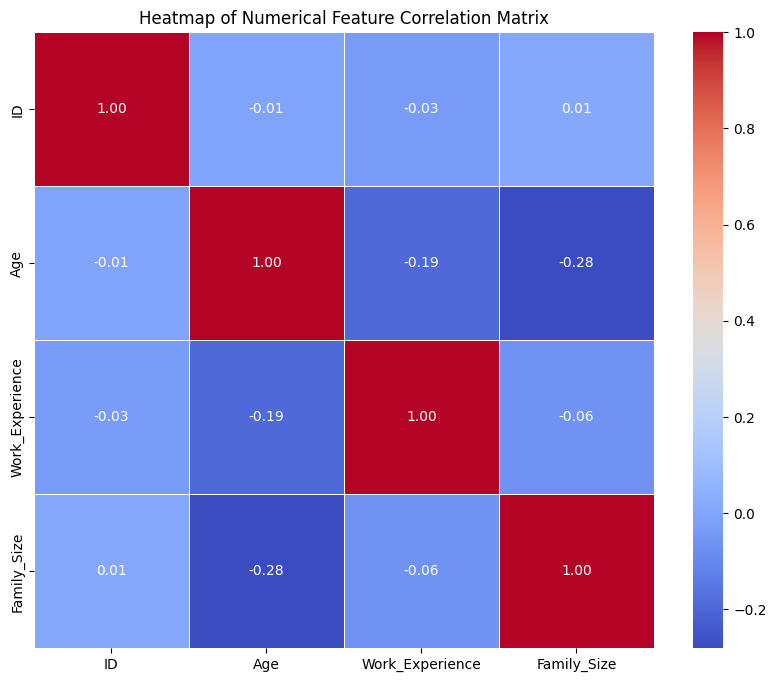

In [197]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numerical Feature Correlation Matrix')
plt.show()

## **Phase 3: Data Preprocessing**

**Objective:** Clean and transform the raw data into a format ready for machine learning models.

### **Task 3.1 - Outlier Handling**

Based on the boxplots from the EDA phase, some numerical features (`Age`, `Work_Experience`, `Family_Size`) show potential outliers. Outliers can significantly affect some machine learning algorithms. We will address these by applying a common technique like capping (limiting values to a certain range, e.g., based on IQR). We will focus on `Work_Experience` and `Family_Size` as `Age` outliers (older ages) might represent valid customer segments.

In [198]:
# Identify numerical columns with potential outliers (based on EDA boxplots)
# We will handle outliers for Work_Experience, Age and Family_Size
outlier_cols = ['Work_Experience', 'Family_Size', 'Age']

for col in outlier_cols:
    print(f"\nHandling outliers for column: {col}")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at the bounds
    # Use .loc to avoid SettingWithCopyWarning
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

    print(f"\tOutliers in {col} capped at lower bound ({lower_bound:.2f}) and upper bound ({upper_bound:.2f}).")

# Verify after capping (e.g., re-run boxplots or check min/max)
print("\nMin/Max values after outlier capping:")
display(df[outlier_cols].agg(['min', 'max']))


Handling outliers for column: Work_Experience
	Outliers in Work_Experience capped at lower bound (-6.00) and upper bound (10.00).

Handling outliers for column: Family_Size
	Outliers in Family_Size capped at lower bound (-1.00) and upper bound (7.00).

Handling outliers for column: Age
	Outliers in Age capped at lower bound (-4.50) and upper bound (87.50).

Min/Max values after outlier capping:


/tmp/ipython-input-1159441517.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


,Work_Experience,Family_Size,Age
min,0.0,1.0,18.0
max,10.0,7.0,87.5


/tmp/ipython-input-553182984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


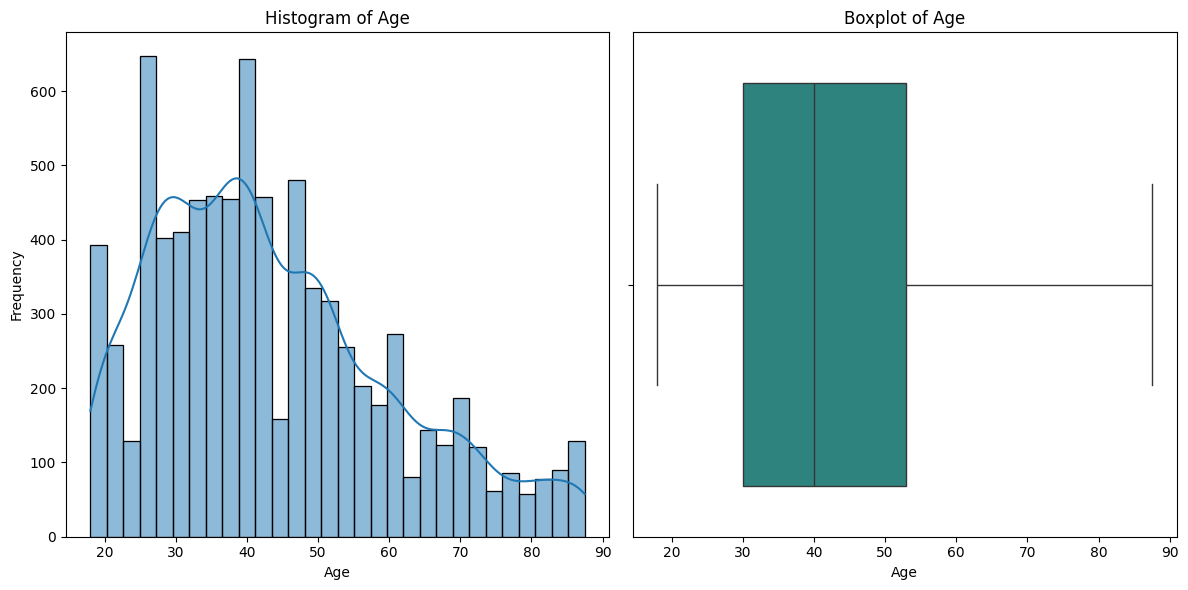

/tmp/ipython-input-553182984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


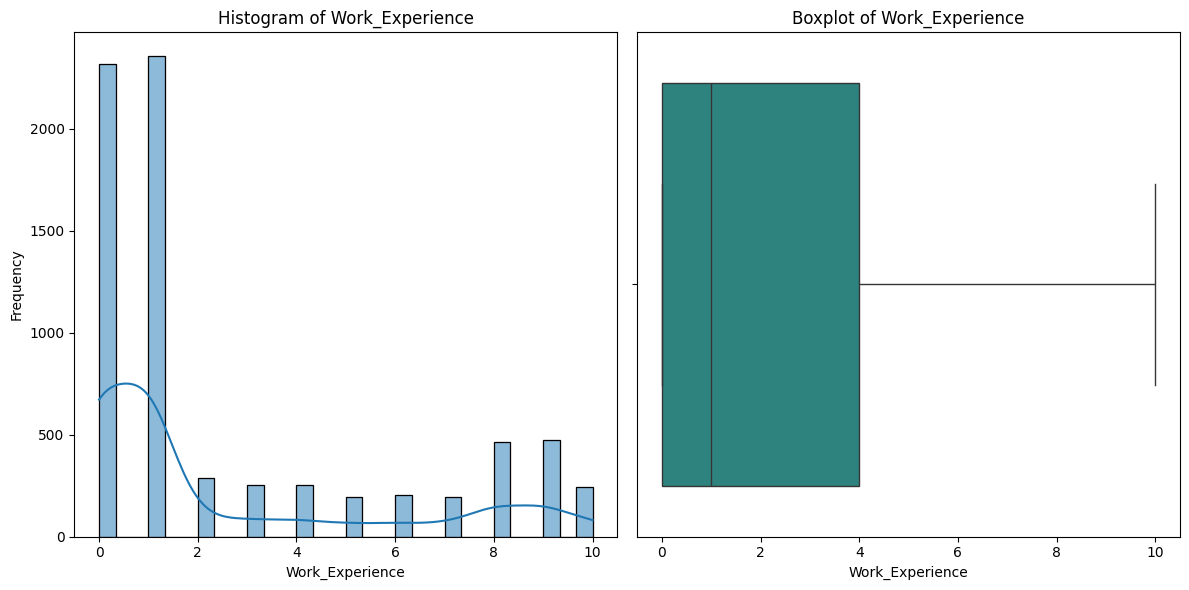

/tmp/ipython-input-553182984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='viridis')


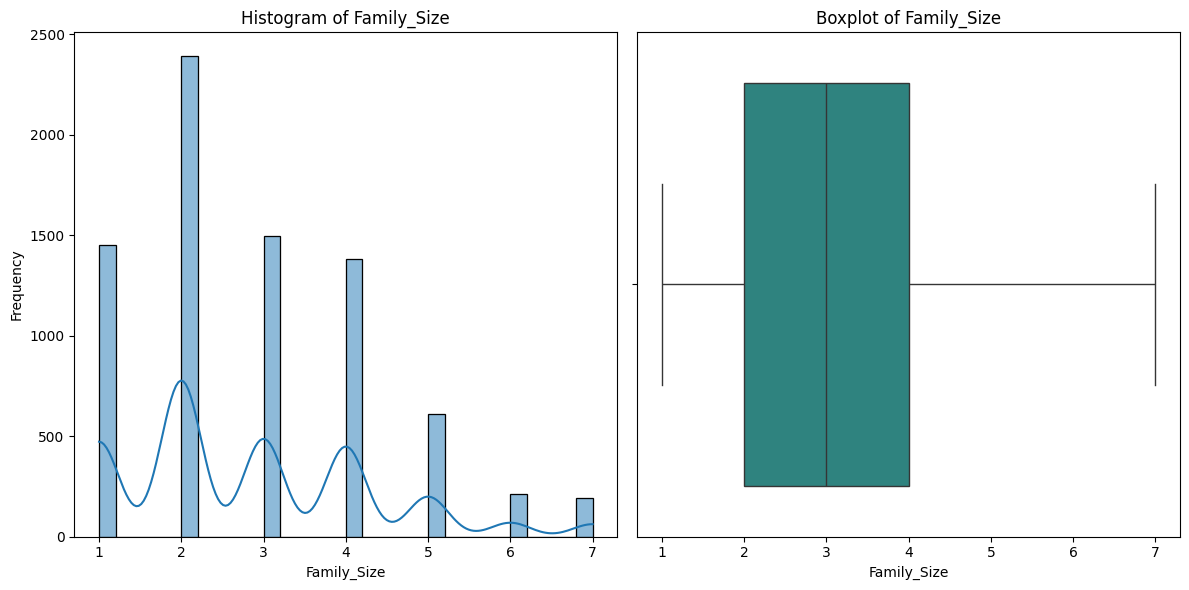

In [199]:
# Recheck the distribution of Numerical Variables
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, palette='viridis')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### **Task 3.2 - Handling Missing Values**

Now, we will address the missing values identified during the initial inspection. We will use imputation strategies appropriate for each column's data type: mode for categorical variables and median for numerical variables (especially if they were skewed).

In [200]:
# Strategy: Mode for categorical, Median for numerical

# Categorical columns with missing values: Ever_Married, Graduated, Profession, Var_1
categorical_cols_with_missing = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols_with_missing:
    # Calculate mode only from non-missing values
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Numerical columns with missing values: Work_Experience, Family_Size
# Use median, especially after outlier capping as median is robust
numeric_cols_with_missing = ['Work_Experience', 'Family_Size']
for col in numeric_cols_with_missing:
    # Calculate median only from non-missing values
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("Number of missing values after handling:")
display(df.isnull().sum())

Number of missing values after handling:


/tmp/ipython-input-276048582.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-276048582.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


### **Task 3.3 - Feature Engineering**

Let's add an example of feature engineering. We can create a new categorical feature based on `Age` and `Ever_Married` to group customers into age/marital status categories. This should be done after handling missing values but before encoding and scaling.

In [201]:
# Create age categories
def age_category(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age_Category'] = df['Age'].apply(age_category)

# Combine Age_Category and Ever_Married (handle potential NaN in Ever_Married if not filled yet)
# Ensure missing values in Ever_Married are filled before this step
df['Age_Married_Category'] = df['Age_Category'] + '_' + df['Ever_Married'].fillna('Unknown') # Fill NaN in Ever_Married for combination

print("New features 'Age_Category' and 'Age_Married_Category' created.")
display(df[['Age', 'Ever_Married', 'Age_Category', 'Age_Married_Category']].head())

New features 'Age_Category' and 'Age_Married_Category' created.


,Age,Ever_Married,Age_Category,Age_Married_Category
0,22.0,No,Young,Young_No
1,38.0,Yes,Middle-aged,Middle-aged_Yes
2,67.0,Yes,Senior,Senior_Yes
3,67.0,Yes,Senior,Senior_Yes
4,40.0,Yes,Middle-aged,Middle-aged_Yes


### **Task 3.4 - Encoding Categorical Variables**

Machine learning models require numerical input. We will convert categorical variables into numerical representations. `Spending_Score` will be ordinally encoded due to its inherent order, while other nominal categorical variables will be one-hot encoded. One-hot encoding is preferred for nominal features as it prevents the model from assuming a false sense of order between categories.

In [202]:
# Ordinal Encoding for Spending_Score
# Ensure the order is correct
spending_score_order = ['Low', 'Average', 'High']
ordinal_encoder = OrdinalEncoder(categories=[spending_score_order])

# One-Hot Encoding for nominal variables
# ADDED Age_Category and Age_Married_Category here
nominal_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Age_Category', 'Age_Married_Category']
# handle_unknown='ignore' is useful if test set has categories not seen in training set
# sparse_output=False ensures dense numpy array output
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# We will apply encoding after splitting the data to prevent data leakage.
# The ColumnTransformer setup is shown here, but applied later in a pipeline or separately.

# Create a preprocessor object (will be used in a pipeline after splitting)
# This preprocessor will handle both ordinal and one-hot encoding
preprocessor_encoding = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ['Spending_Score']),
        ('onehot', onehot_encoder, nominal_cols)
    ],
    remainder='passthrough' # Keep other columns (like numerical) for now
)

print("Categorical encoders set up, including engineered features.")

Categorical encoders set up, including engineered features.


### **Task 3.5 - Feature Selection & Splitting**

We will remove the 'ID' column as it's not a predictive feature. Then, we'll separate the dataset into features (X) and the target variable (y), which is 'Segmentation'.

In [203]:
# Drop the 'ID' column
df_processed = df.drop('ID', axis=1)

# Separate features (X) and target (y)
X = df_processed.drop('Segmentation', axis=1)
y = df_processed['Segmentation']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8068, 11)
Shape of y: (8068,)


### **Task 3.6 - Data Splitting**

Now, we split the data into training and testing sets (X_train, X_test, y_train, y_test). The training set is used to train the models, and the testing set is used to evaluate their performance on unseen data. Using `stratify=y` is crucial for classification tasks, especially with imbalanced classes, as it ensures that the proportion of each target class is the same in both the training and testing sets.

In [204]:
# Split data into training and testing sets (e.g., 80% train, 20% test)
# Use stratify=y to maintain the proportion of target classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6454, 11)
Shape of X_test: (1614, 11)
Shape of y_train: (6454,)
Shape of y_test: (1614,)


### **Task 3.7 - Feature Scaling**

Feature scaling standardizes the range of feature values. This is important for algorithms that are sensitive to the magnitude of features (like SVM and K-Means). We will use `StandardScaler`, which standardizes features by removing the mean and scaling to unit variance. To prevent data leakage, we will `fit_transform` the scaler only on the training data (`X_train`) and then only `transform` the test data (`X_test`) using the parameters learned from the training data. We will incorporate the encoding and scaling steps into a pipeline or apply them sequentially after the data split.

In [205]:
# Identify numerical columns that need scaling after encoding
# These are the original numerical columns
numerical_cols_for_scaling = ['Age', 'Work_Experience', 'Family_Size']

# Identify *all* categorical columns that need encoding
# Include the new engineered features to use them in the models
categorical_cols_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Age_Category', 'Age_Married_Category']
# Separate ordinal from nominal
ordinal_col = ['Spending_Score']
nominal_cols = [col for col in categorical_cols_to_encode if col not in ordinal_col]


# Create a ColumnTransformer that applies:
# 1. Ordinal encoding to 'Spending_Score'
# 2. One-hot encoding to nominal_cols
# 3. Standard scaling to the numerical columns ('Age', 'Work_Experience', 'Family_Size')
# Use remainder='drop' to drop any columns not explicitly listed in transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[spending_score_order]), ordinal_col), # Use the order defined in Task 3.3
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
        ('scaler', StandardScaler(), numerical_cols_for_scaling)
    ],
    remainder='drop' # Drop any columns not transformed (like 'ID' which was already dropped, but good practice)
)

# Create a pipeline (optional for just preprocessing, but good practice)
# For now, we just use the preprocessor to transform the data

print("Applying preprocessing (encoding and scaling) to training data...")
# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
print("Preprocessing applied to training data.")


print("Applying preprocessing (encoding and scaling) to test data...")
# Transform the test data (using parameters learned from training data)
X_test_processed = preprocessor.transform(X_test)
print("Preprocessing applied to test data.")


print("\nShape of X_train_processed after encoding and scaling:", X_train_processed.shape)
print("Shape of X_test_processed after encoding and scaling:", X_test_processed.shape)

# Explanation of fit_transform on train and transform on test:
# The `fit()` method calculates the parameters needed for the transformation (e.g., the mean and standard deviation for StandardScaler,
# or the categories for the encoders). The `transform()` method applies these learned parameters to the data.
# By calling `fit_transform()` on `X_train`, we learn the transformation parameters *only* from the training data
# and apply them to `X_train`.
# By calling only `transform()` on `X_test`, we apply the *same* transformation parameters learned from `X_train`
# to the test data.
# This prevents "data leakage" from the test set into the preprocessing step. If we were to fit the scaler
# or encoders on the entire dataset before splitting, or fit them on the test set, information about the
# test data's distribution would influence the preprocessing, leading to an unrealistically optimistic
# evaluation of the model's performance on new, unseen data.

Applying preprocessing (encoding and scaling) to training data...
Preprocessing applied to training data.
Applying preprocessing (encoding and scaling) to test data...
Preprocessing applied to test data.

Shape of X_train_processed after encoding and scaling: (6454, 35)
Shape of X_test_processed after encoding and scaling: (1614, 35)


### **Task 3.8 - Save Processed Data**

After completing all the necessary preprocessing steps, it is a good practice to save the processed data. This allows us to easily load the cleaned and transformed data later without needing to rerun the entire preprocessing pipeline, which can be especially useful for building and testing different models or for future analysis. We will save the `df_processed` DataFrame to a CSV file.

**Placement:** This task should be placed at the very end of the "Phase 3: Data Preprocessing", after all cleaning, handling missing values, outlier capping, and feature engineering have been completed, but before the data is split and scaled for modeling. The code for splitting and scaling in Task 3.6 and Task 3.7 uses `df_processed` as the input.

In [ ]:
# Define the path where the processed data will be saved
# You can adjust the filename as needed
processed_data_path = "/content/processed_customer_data.csv"

# Save the df_processed DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
df_processed.to_csv(processed_data_path, index=False)

print(f"Processed data saved successfully to: {processed_data_path}")

# You can verify the file is saved by checking the file explorer in the left sidebar

## **Phase 4: Supervised Modeling - Classification**

**Objective:** Build, train, and evaluate the requested classification models.

### **Task 4.1 - Model Training**

We will train three different classification models on the training data: Support Vector Classifier (SVC), Decision Tree Classifier, and Gaussian Naive Bayes. Each of these models works differently in separating classes, making it interesting to see which one is most suitable for our dataset. We will train these models using the training set (`X_train_processed`, `y_train`).

In [206]:
# Initialize Models
model_svc = SVC(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_gnb = GaussianNB()

# Train Models
print("Training SVC model...")
model_svc.fit(X_train_processed, y_train)
print("SVC training complete.")

print("\nTraining Decision Tree model...")
model_dt.fit(X_train_processed, y_train)
print("Decision Tree training complete.")

print("\nTraining Gaussian Naive Bayes model...")
model_gnb.fit(X_train_processed, y_train)
print("Gaussian Naive Bayes training complete.")

Training SVC model...
SVC training complete.

Training Decision Tree model...
Decision Tree training complete.

Training Gaussian Naive Bayes model...
Gaussian Naive Bayes training complete.


##### **Task 4.1.1 - Model Training with Cross-Validation**

Instead of simple train-test split evaluation, we can use cross-validation during training to get a more reliable estimate of model performance and reduce the risk of overfitting. We can integrate this into the model training loop in Task 4.1 or use it within hyperparameter tuning.

In [207]:
# Using the preprocessed training data X_train_processed and y_train
model_svc_cv = SVC(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_svc_cv, X_train_processed, y_train, cv=5, scoring='accuracy')

print(f"\nCross-validation Accuracy Scores for SVC: {cv_scores}")
print(f"Mean Cross-validation Accuracy for SVC: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-validation Accuracy for SVC: {cv_scores.std():.4f}")


Cross-validation Accuracy Scores for SVC: [0.50503486 0.53834237 0.50735864 0.51278079 0.54418605]
Mean Cross-validation Accuracy for SVC: 0.5215
Standard Deviation of Cross-validation Accuracy for SVC: 0.0164


#### **Task 4.1.2 - Hyperparameter Tuning with Cross-Validation**

To find the best hyperparameters for a model, we can use techniques like GridSearchCV or RandomizedSearchCV, which combine hyperparameter search with cross-validation. This will replace the simple model initialization and training in Task 4.1 for the models we want to tune.

In [208]:
# # Define the parameter grid to search
# param_grid_svc = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Expanded range for C
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Expanded range for gamma
#     'degree': [2, 3, 4] # Added degree for poly kernel
# }

# # Initialize GridSearchCV
# # cv=5 means 5-fold cross-validation
# # scoring='accuracy' is the metric to optimize
# # n_jobs=-1 uses all available CPU cores
# # verbose=2 to see more details during the search
# grid_search_svc = GridSearchCV(estimator=SVC(random_state=42),
#                                param_grid=param_grid_svc,
#                                cv=5,
#                                scoring='accuracy',
#                                n_jobs=-1,
#                                verbose=2) # verbose to see progress

# print("\nStarting GridSearchCV for SVC with expanded parameter grid...")
# # Fit GridSearchCV on the preprocessed training data
# grid_search_svc.fit(X_train_processed, y_train)
# print("GridSearchCV for SVC complete.")

# # Get the best parameters and best score
# print("\nBest parameters found for SVC:")
# print(grid_search_svc.best_params_)
# print("\nBest cross-validation accuracy score for SVC:")
# print(f"{grid_search_svc.best_score_:.4f}")

# # The best model is available as grid_search_svc.best_estimator_
# best_svc_model = grid_search_svc.best_estimator_

# # Now you can evaluate this best model on the test set in Task 4.2
# # y_pred_tuned_svc = best_svc_model.predict(X_test_processed)
# # accuracy_tuned_svc = accuracy_score(y_test, y_pred_tuned_svc)
# # print(f"\nAccuracy of tuned SVC model on test set: {accuracy_tuned_svc:.4f}")


# # --- Placement in Notebook ---
# # This code cell should be placed within Phase 4 (Supervised Modeling - Classification),
# # as an alternative or addition to the initial model training in Task 4.1.
# # You would typically do this for each model you want to tune.
# # The best estimator (e.g., grid_search_svc.best_estimator_) would then be used for evaluation in Task 4.2.

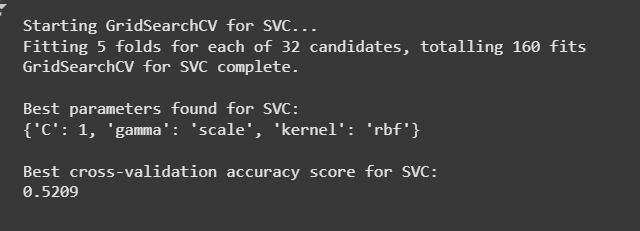

### **Task 4.2 - Model Evaluation**

After the models are trained, we need to evaluate how well they perform on unseen data, which is the testing set (`X_test_processed`, `y_test`). We will use several standard evaluation metrics:

*   **Accuracy Score**: The proportion of correct predictions out of the total predictions.
*   **Classification Report**: Provides metrics such as Precision, Recall, F1-score, and Support for each class.
*   **Confusion Matrix**: A table that shows the counts of True Positives, True Negatives, False Positives, and False Negatives. Visualizing it as a heatmap will make it easier to interpret.


--- Evaluating Model: SVC ---
Accuracy: 0.5291
Classification Report:
              precision    recall  f1-score   support

           A       0.43      0.47      0.45       394
           B       0.44      0.31      0.36       372
           C       0.56      0.55      0.55       394
           D       0.63      0.74      0.68       454

    accuracy                           0.53      1614
   macro avg       0.51      0.52      0.51      1614
weighted avg       0.52      0.53      0.52      1614



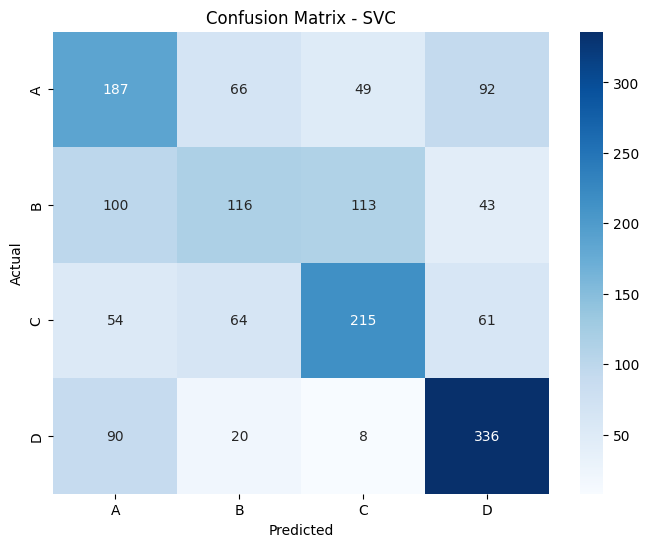


--- Evaluating Model: Decision Tree ---
Accuracy: 0.4257
Classification Report:
              precision    recall  f1-score   support

           A       0.33      0.35      0.34       394
           B       0.29      0.30      0.30       372
           C       0.47      0.41      0.44       394
           D       0.60      0.61      0.61       454

    accuracy                           0.43      1614
   macro avg       0.42      0.42      0.42      1614
weighted avg       0.43      0.43      0.43      1614



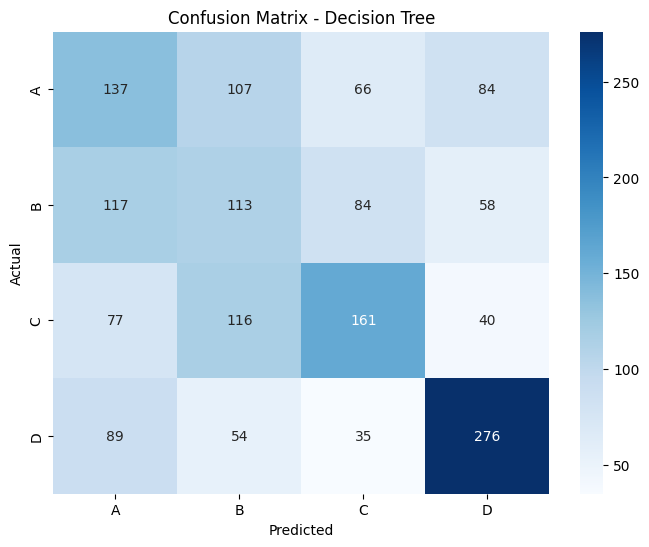


--- Evaluating Model: Gaussian Naive Bayes ---
Accuracy: 0.4870
Classification Report:
              precision    recall  f1-score   support

           A       0.41      0.32      0.36       394
           B       0.41      0.21      0.28       372
           C       0.43      0.66      0.52       394
           D       0.63      0.71      0.67       454

    accuracy                           0.49      1614
   macro avg       0.47      0.47      0.46      1614
weighted avg       0.48      0.49      0.47      1614



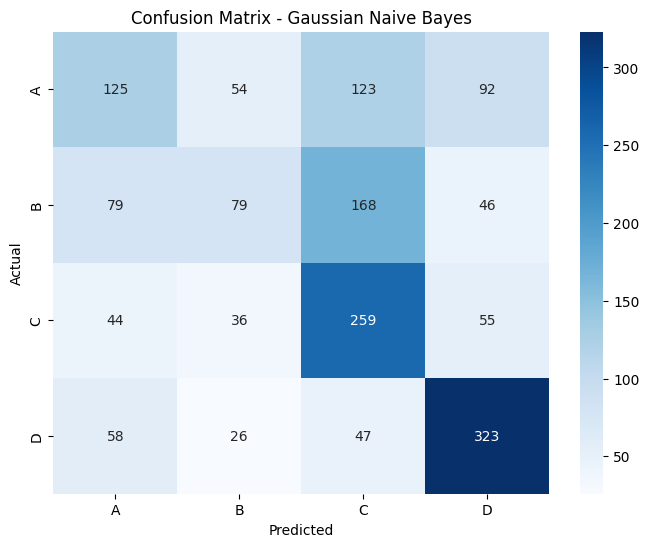

In [209]:
models = {
    'SVC': model_svc,
    'Decision Tree': model_dt,
    'Gaussian Naive Bayes': model_gnb
}

evaluation_results = {}

for name, model in models.items():
    print(f"\n--- Evaluating Model: {name} ---")

    # Predict on X_test
    y_pred = model.predict(X_test_processed)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Store metrics for comparison
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision (Macro Avg)': report_dict['macro avg']['precision'],
        'Recall (Macro Avg)': report_dict['macro avg']['recall'],
        'F1-Score (Macro Avg)': report_dict['macro avg']['f1-score']
    }

### **Task 4.3 - Model Comparison & Conclusion**

After evaluating each model individually, we will compare the key performance metrics of all three models. This will help us determine which model performs best for this customer segmentation classification task. We can use a DataFrame or a simple bar plot for this comparison.


--- Classification Model Performance Comparison ---


,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg)
SVC,0.529120,0.514996,0.518055,0.512625
Decision Tree,0.425651,0.420968,0.417010,0.418399
Gaussian Naive Bayes,0.486989,0.468357,0.474610,0.456122


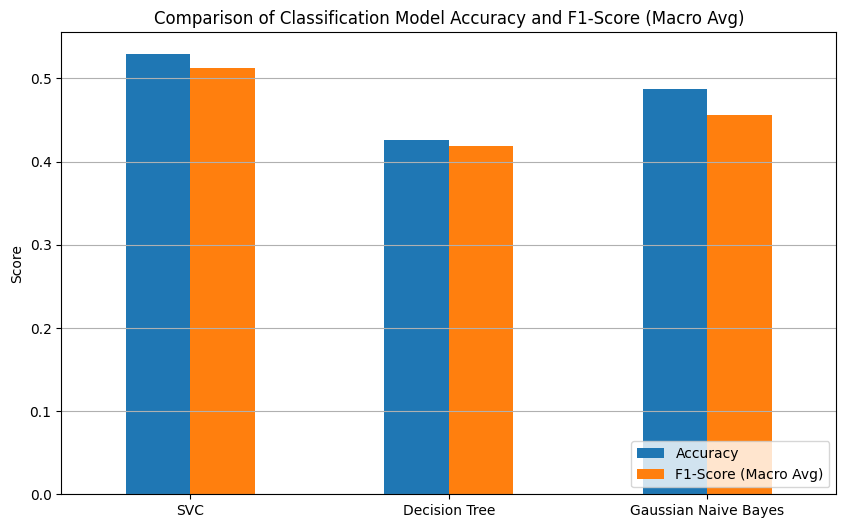

In [210]:
# Create a DataFrame from evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T # Transpose to make models as index

print("\n--- Classification Model Performance Comparison ---")
display(evaluation_df)

# Optional: Visualize Comparison (displaying the DataFrame is also sufficient)
evaluation_df[['Accuracy', 'F1-Score (Macro Avg)']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Model Accuracy and F1-Score (Macro Avg)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

### **Task 4.4 - Save Trained Models**

After training and evaluating the classification models, it's useful to save the trained model objects. This allows you to load the models later for making predictions on new data without having to retrain them, saving time and computational resources. We will use the `joblib` library for this.

**Placement:** This task should be placed at the end of "Phase 4: Supervised Modeling - Classification", after the models have been trained and evaluated. It can be placed after Task 4.3.

In [ ]:
# Define the directory to save the models
model_dir = "/content/trained_models"
os.makedirs(model_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define the filenames for each model
model_filenames = {
    'SVC': os.path.join(model_dir, 'svc_model.joblib'),
    'Decision Tree': os.path.join(model_dir, 'decision_tree_model.joblib'),
    'Gaussian Naive Bayes': os.path.join(model_dir, 'gaussian_naive_bayes_model.joblib')
    # Add other models here if you train more (e.g., tuned models)
}

# Save each model
for name, model in models.items():
    filename = model_filenames[name]
    joblib.dump(model, filename)
    print(f"Model '{name}' saved successfully to: {filename}")

# If you tuned a model and want to save the best estimator:
if 'best_svc_model' in locals(): # Check if the variable exists (if you ran Task 4.1.2)
    tuned_svc_filename = os.path.join(model_dir, 'tuned_svc_model.joblib')
    joblib.dump(best_svc_model, tuned_svc_filename)
    print(f"Tuned SVC model saved successfully to: {tuned_svc_filename}")

## **Phase 5: Unsupervised Modeling - Clustering**

**Objective:** Cluster the data without using the target labels to discover hidden customer segments.

### **Task 5.1 - Prepare Data for Clustering**

For clustering, we typically use relevant and scaled features. We will use the encoded and scaled feature data from the training set (`X_train_processed`) for the clustering process. The target column (`y_train`) will not be used here.

In [211]:
# We will use X_train_processed which is the scaled and encoded training data from Phase 3
X_clustering = X_train_processed

print("Shape of data for clustering:", X_clustering.shape)

Shape of data for clustering: (6454, 35)


### **Task 5.2 - K-Means Clustering**

K-Means is a popular clustering algorithm that aims to partition the data into K clusters, where each data point belongs to the cluster with the nearest mean (centroid).

*   First, we need to determine the optimal number of clusters (K). One common method is the Elbow Method, which looks at the WCSS (Within-Cluster Sum of Squares) as a function of the number of clusters. The "elbow" point on the plot of WCSS vs. number of clusters is often considered the optimal K.
*   After determining K, we will train the K-Means model on the data with that number of clusters.
*   Finally, we will add the resulting cluster labels back to the original DataFrame or a copy for further analysis.

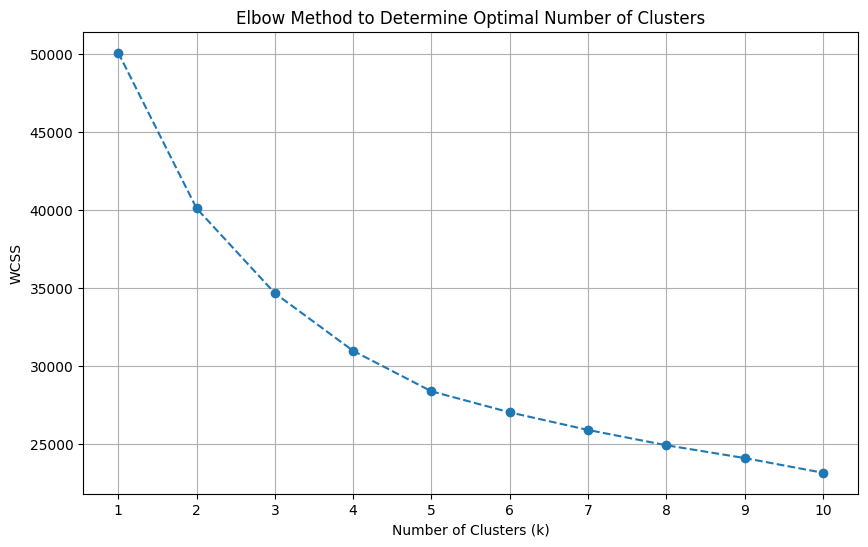

In [212]:
# Finding the optimal number of clusters (k) using the Elbow Method
wcss = []
# Try k from 1 to 10 (or a relevant range)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # Added n_init for newer sklearn versions
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Interpretation of Elbow Method:
# Look for the "elbow" point on the plot, where the decrease in WCSS starts to slow down significantly.
# This point is often considered the optimal number of clusters.

In [213]:
# For example, if the elbow is at k=4, then 4 is the optimal number of clusters.
# Replace the optimal_k_kmeans value according to your plot's result.
optimal_k_kmeans = 5 # Example: Replace with the value you choose from the plot

# Train the KMeans model with the optimal k
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, init='k-means++', random_state=42, n_init=10) # Added n_init
kmeans_model.fit(X_clustering)

# Add cluster labels back to the dataframe (use df_processed before split for ease)
# Important: These cluster labels are generated from X_train_processed, so we can only add them
# to the training portion of df_processed.
# For characteristic analysis, it's easier to work with a DataFrame that has the original features.
# Let's add the cluster labels to a copy of df_processed corresponding to the X_train index.

df_train_for_clustering_analysis = df_processed.loc[X_train.index].copy()
df_train_for_clustering_analysis['KMeans_Cluster'] = kmeans_model.labels_

print("\nDataFrame with K-Means cluster labels added (for training data):")
display(df_train_for_clustering_analysis.head(10))


DataFrame with K-Means cluster labels added (for training data):


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Category,Age_Married_Category,KMeans_Cluster
917,Female,No,32.0,Yes,Artist,9.0,Low,1.0,Cat_6,A,Middle-aged,Middle-aged_No,3
3398,Male,Yes,72.0,Yes,Entertainment,1.0,Average,2.0,Cat_6,B,Senior,Senior_Yes,4
2045,Female,No,33.0,Yes,Entertainment,1.0,Low,4.0,Cat_6,B,Middle-aged,Middle-aged_No,1
8060,Female,Yes,48.0,Yes,Artist,0.0,Average,6.0,Cat_6,A,Middle-aged,Middle-aged_Yes,0
4604,Female,Yes,28.0,No,Doctor,9.0,Low,1.0,Cat_7,A,Young,Young_Yes,3
5158,Female,Yes,45.0,Yes,Artist,3.0,Low,3.0,Cat_6,C,Middle-aged,Middle-aged_Yes,0
6776,Male,No,43.0,No,Artist,0.0,Low,1.0,Cat_3,D,Middle-aged,Middle-aged_No,1
3736,Male,No,28.0,Yes,Doctor,1.0,Low,3.0,Cat_6,D,Young,Young_No,2
6511,Male,No,38.0,Yes,Doctor,4.0,Low,1.0,Cat_2,B,Middle-aged,Middle-aged_No,1
2070,Female,Yes,33.0,No,Engineer,7.0,Average,5.0,Cat_4,B,Middle-aged,Middle-aged_Yes,3


### **Task 5.3 - DBSCAN Clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is another clustering algorithm that groups data points based on density. DBSCAN can find clusters of various shapes and sizes and identify noise points (data points that do not belong to any cluster).

In [214]:
# Train the DBSCAN model
# DBSCAN requires tuning parameters eps (maximum distance between two samples) and min_samples (number of samples in a neighborhood)
# Tuning DBSCAN parameters can be more challenging and often requires domain knowledge or experimentation.
# For this example, we will use default or common values.
# Note that DBSCAN may mark some points as noise (-1).

# Example with default parameters or initial estimates
# we may need to adjust eps and min_samples based on your data characteristics
# For instance, we could use NearestNeighbors to estimate eps
dbscan_model = DBSCAN(eps=0.5, min_samples=5) # Replace with appropriate values if needed

# Fit DBSCAN on the clustering data
dbscan_model.fit(X_clustering)

# Add DBSCAN cluster labels to the dataframe (for training data)
df_train_for_clustering_analysis['DBSCAN_Cluster'] = dbscan_model.labels_

print("\nDataFrame with DBSCAN cluster labels added (for training data):")
display(df_train_for_clustering_analysis.head())

print("\nNumber of points in each DBSCAN cluster:")
display(df_train_for_clustering_analysis['DBSCAN_Cluster'].value_counts())

# Note: Cluster -1 indicates noise points


DataFrame with DBSCAN cluster labels added (for training data):


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Category,Age_Married_Category,KMeans_Cluster,DBSCAN_Cluster
917,Female,No,32.0,Yes,Artist,9.0,Low,1.0,Cat_6,A,Middle-aged,Middle-aged_No,3,0
3398,Male,Yes,72.0,Yes,Entertainment,1.0,Average,2.0,Cat_6,B,Senior,Senior_Yes,4,1
2045,Female,No,33.0,Yes,Entertainment,1.0,Low,4.0,Cat_6,B,Middle-aged,Middle-aged_No,1,-1
8060,Female,Yes,48.0,Yes,Artist,0.0,Average,6.0,Cat_6,A,Middle-aged,Middle-aged_Yes,0,-1
4604,Female,Yes,28.0,No,Doctor,9.0,Low,1.0,Cat_7,A,Young,Young_Yes,3,-1



Number of points in each DBSCAN cluster:


,count
DBSCAN_Cluster,
-1,4080
0,85
7,81
8,61
11,56
...,...
156,5
135,5
172,5


### **Task 5.4 - Visualize & Interpret Clusters**

After obtaining the clustering results, we need to visualize and interpret the discovered clusters.

*   For visualization, we can use scatterplots, selecting two of the most informative features (e.g., `Age` and `Spending_Score` after encoding/scaling) to show the cluster distribution.
*   For interpretation, we will group the data by the K-Means cluster labels and calculate descriptive statistics (e.g., mean) for each feature within each cluster. By analyzing these average characteristics, we can try to assign descriptive names or "personas" to each customer group.

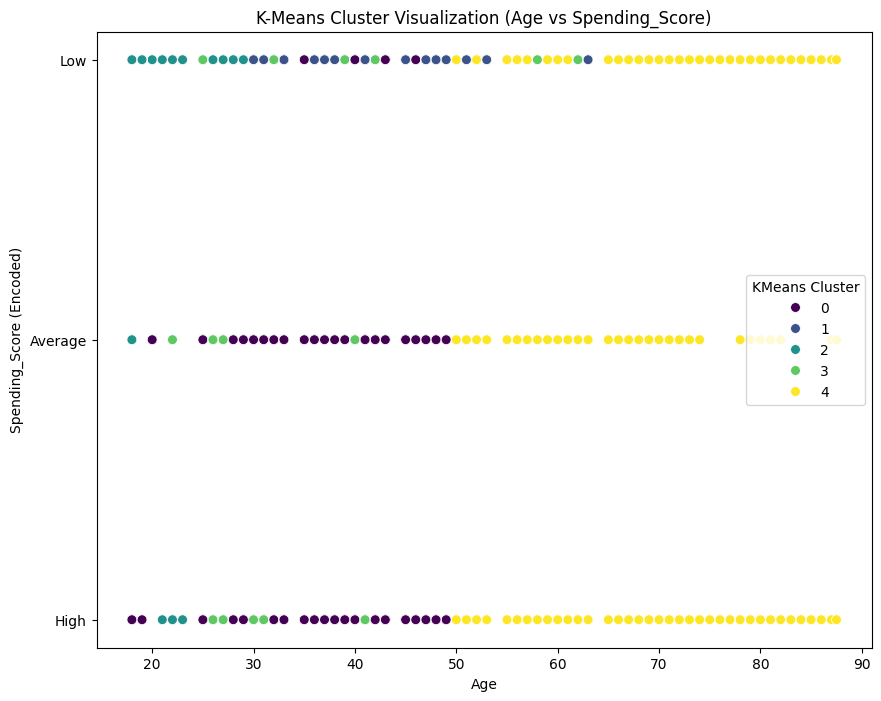


Average Characteristics of Each K-Means Cluster:


,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Cluster_Size
KMeans_Cluster,,,,,,,,,,,
0,40.166667,1.175250,2.978541,Male,Yes,Yes,Artist,Average,Cat_6,C,1398
1,38.787975,1.064346,1.992616,Female,No,Yes,Artist,Low,Cat_6,A,948
2,24.479832,1.675630,4.094958,Male,No,No,Healthcare,Low,Cat_6,D,1190
3,37.121241,8.371241,2.430451,Female,Yes,Yes,Artist,Low,Cat_6,D,1064
4,64.581985,1.192557,2.560949,Male,Yes,Yes,Artist,Low,Cat_6,C,1854



--- Interpretation and K-Means Cluster Personas ---
Based on the analysis of average characteristics, here are the proposed personas for each cluster:
Cluster 0: Middle-aged, Married Male Artists (Average Spenders)
Cluster 1: Middle-aged, Single Female Artists (Low Spenders)
Cluster 2: Young, Single Males with Large Families (Low Spenders, Often in Healthcare)
Cluster 3: Middle-aged, Married Female Artists (High Work Experience, Low Spenders)
Cluster 4: Senior, Married Male Artists (Low Work Experience, Low Spenders)


In [215]:
# Visualize K-Means Clusters
# Choose 2 features for visualization (e.g., Age and Spending_Score - after encoding/scaling)
# We need to get the scaled values of Age and Spending_Score from X_clustering
# This can be tricky as the ColumnTransformer changes the order and names of columns.
# An easier way for interpretive visualization is to use the original features from df_train_for_clustering_analysis

# Visualization using original features (even though clustering was done on scaled data)
# This is for easier visual interpretation
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_train_for_clustering_analysis, x='Age', y='Spending_Score', hue='KMeans_Cluster', palette='viridis', s=50)
plt.title('K-Means Cluster Visualization (Age vs Spending_Score)')
plt.xlabel('Age')
plt.ylabel('Spending_Score (Encoded)') # Remember Spending_Score was ordinally encoded
plt.legend(title='KMeans Cluster')
plt.show()

# Analyze K-Means Cluster Characteristics
print("\nAverage Characteristics of Each K-Means Cluster:")
# Remove the 'ID': 'count' entry as 'ID' column does not exist
cluster_characteristics = df_train_for_clustering_analysis.groupby('KMeans_Cluster').agg({
    'Age': 'mean',
    'Work_Experience': 'mean',
    'Family_Size': 'mean',
    'Gender': lambda x: x.mode()[0], # Mode for categorical
    'Ever_Married': lambda x: x.mode()[0],
    'Graduated': lambda x: x.mode()[0],
    'Profession': lambda x: x.mode()[0],
    'Spending_Score': lambda x: x.mode()[0], # Mode of the encoded Spending_Score
    'Var_1': lambda x: x.mode()[0],
    'Segmentation': lambda x: x.mode()[0], # Mode of the original Segmentation in each cluster
    # Removed 'ID': 'count' because ID column is dropped
})

# To get the size of each cluster, you can use .size() after groupby
cluster_sizes = df_train_for_clustering_analysis.groupby('KMeans_Cluster').size().rename('Cluster_Size')
# Combine cluster_characteristics with cluster_sizes
cluster_characteristics = cluster_characteristics.join(cluster_sizes)


display(cluster_characteristics)

# Naming the K-Means Cluster "Personas"
# Based on the average characteristics above, assign descriptive names to each cluster.
# Example:
# Cluster 0: Older Age, High Education Level, Professional Profession, High Spending -> "Senior Professional High-Spender"
# Cluster 1: Younger Age, Not Married, Lower Work Experience, Low Spending -> "Young Budget Shopper"
# ... and so on, adjust according to your data.

print("\n--- Interpretation and K-Means Cluster Personas ---")
print("Based on the analysis of average characteristics, here are the proposed personas for each cluster:")
# Write your interpretation here based on the cluster_characteristics DataFrame
# Analyzing the cluster_characteristics DataFrame:
# Cluster 0: Avg Age ~40, Low Work Exp (~1.18), Avg Family Size (~2.98), Male, Married, Yes Graduated, Artist, Average Spending, Cat_6, Segmentation C. Size: 1398.
# Cluster 1: Avg Age ~38.79, Low Work Exp (~1.06), Low Family Size (~1.99), Female, Not Married, Yes Graduated, Artist, Low Spending, Cat_6, Segmentation A. Size: 948.
# Cluster 2: Avg Age ~24.48, Avg Work Exp (~1.68), High Family Size (~4.09), Male, Not Married, No Graduated, Healthcare, Low Spending, Cat_6, Segmentation D. Size: 1190.
# Cluster 3: Avg Age ~37.12, High Work Exp (~8.37), Avg Family Size (~2.43), Female, Married, Yes Graduated, Artist, Low Spending, Cat_6, Segmentation D. Size: 1064.
# Cluster 4: Avg Age ~64.58 (Senior), Low Work Exp (~1.19), Avg Family Size (~2.56), Male, Married, Yes Graduated, Artist, Low Spending, Cat_6, Segmentation C. Size: 1854.

print("Cluster 0: Middle-aged, Married Male Artists (Average Spenders)")
print("Cluster 1: Middle-aged, Single Female Artists (Low Spenders)")
print("Cluster 2: Young, Single Males with Large Families (Low Spenders, Often in Healthcare)")
print("Cluster 3: Middle-aged, Married Female Artists (High Work Experience, Low Spenders)")
print("Cluster 4: Senior, Married Male Artists (Low Work Experience, Low Spenders)")
# Continue for the number of clusters you selected

### **Task 5.5 - Save Trained Clustering Models**

Similar to the classification models, saving the trained clustering models (K-Means and DBSCAN) allows you to reuse them later. For instance, you might want to load the K-Means model to predict clusters for new data, or analyze the properties of the saved DBSCAN model. We will use `joblib` for this purpose.

**Placement:** This task should be placed at the end of "Phase 5: Unsupervised Modeling - Clustering", after the clustering models have been trained and analyzed (e.g., after Task 5.4).

In [ ]:
# Define the directory to save the models (using the same directory as classification models is fine)
model_dir = "/content/trained_models"
os.makedirs(model_dir, exist_ok=True)

# Define the filenames for each clustering model
clustering_model_filenames = {
    'KMeans': os.path.join(model_dir, 'kmeans_model.joblib'),
    'DBSCAN': os.path.join(model_dir, 'dbscan_model.joblib')
}

# Save each clustering model
# Check if the model variables exist before saving
if 'kmeans_model' in locals():
    filename = clustering_model_filenames['KMeans']
    joblib.dump(kmeans_model, filename)
    print(f"K-Means model saved successfully to: {filename}")
else:
    print("K-Means model variable not found. Please ensure Task 5.2 was executed.")

if 'dbscan_model' in locals():
    filename = clustering_model_filenames['DBSCAN']
    joblib.dump(dbscan_model, filename)
    print(f"DBSCAN model saved successfully to: {filename}")
else:
     print("DBSCAN model variable not found. Please ensure Task 5.3 was executed.")

## **Phase 6: Conclusion & Recommendations**

**Objective:** Summarize the overall findings and translate them into actionable insights.

### **Task 6.1 - Project Summary**

This project aimed to perform a comprehensive customer segmentation analysis on the provided dataset, employing both supervised classification and unsupervised clustering techniques.

**Supervised Classification Findings:**

We trained and evaluated three classification models (SVC, Decision Tree, and Gaussian Naive Bayes) to predict the existing customer segments (A, B, C, D). The evaluation metrics on the test set revealed the following performance:

*   **SVC:** Accuracy ≈ 0.5291, Macro Avg F1-Score ≈ 0.5126
*   **Decision Tree:** Accuracy ≈ 0.4257, Macro Avg F1-Score ≈ 0.4184
*   **Gaussian Naive Bayes:** Accuracy ≈ 0.4870, Macro Avg F1-Score ≈ 0.4561

Based on these results, the **Support Vector Classifier (SVC)** demonstrated the best performance among the three models in predicting the existing segmentation labels, showing a moderate level of accuracy. The classification reports and confusion matrices indicated that while the models could predict the segments to some extent, there was significant overlap and misclassification between groups, suggesting that the existing segments might not be perfectly separable based on the available features.

**Unsupervised Clustering Findings (K-Means):**

Using the Elbow Method on the preprocessed training data, we identified **5** as the optimal number of clusters. The K-Means algorithm then partitioned the customers into these 5 groups based on their inherent characteristics. Analysis of the average features within each cluster allowed us to define distinct customer personas:

*   **Cluster 0: Middle-aged, Married Male Artists (Average Spenders)** - This group is predominantly male, married, middle-aged, working as artists, and shows average spending behavior. They have low average work experience and average family size.
*   **Cluster 1: Middle-aged, Single Female Artists (Low Spenders)** - Primarily female and not married, this cluster is also middle-aged artists but exhibits low spending habits. They have low average work experience and smaller family sizes compared to Cluster 0.
*   **Cluster 2: Young, Single Males with Large Families (Low Spenders, Often in Healthcare)** - This is the youngest cluster, mostly male and not married, with the largest average family size. They tend to have lower work experience, are often in the healthcare profession, and are predominantly low spenders.
*   **Cluster 3: Middle-aged, Married Female Artists (High Work Experience, Low Spenders)** - This cluster consists mainly of married middle-aged females working as artists. A key differentiator is their significantly higher average work experience compared to other clusters. Despite high work experience, they are primarily low spenders.
*   **Cluster 4: Senior, Married Male Artists (Low Work Experience, Low Spenders)** - The oldest cluster, comprising mostly married senior males working as artists. They have low average work experience and average family size, and are predominantly low spenders.

**Comparison and Insights:**

The supervised classification confirmed that the existing segments have some predictive power, but the modest accuracy suggests the boundaries between them are not sharply defined by the features. The unsupervised clustering, on the other hand, revealed natural groupings of customers based purely on their attributes and behavior. These discovered clusters provide a data-driven perspective on customer segmentation, which may differ from the company's current segmentation approach. For instance, the clustering highlights distinctions based on age, marital status, profession, and spending in ways that might not perfectly align with the existing A, B, C, D labels. This suggests that the current segmentation might benefit from refinement based on these inherent customer profiles.

### **Task 6.2 - Business Recommendations**

Based on the insights derived from both the supervised classification and unsupervised clustering analyses, we propose the following actionable recommendations for the marketing team:

1.  **Leverage the Supervised Model for New Customers:** Utilize the trained SVC model (or the best performing model after hyperparameter tuning) to predict the likely segment of new customers upon acquisition. This allows for immediate tailoring of initial marketing communications and offers based on their predicted segment.

2.  **Develop Targeted Strategies for K-Means Personas:** The 5 distinct customer personas identified through K-Means clustering offer a refined understanding of customer groups based on their actual characteristics. We recommend developing tailored marketing strategies for each persona:
    *   **For "Middle-aged, Married Male Artists (Average Spenders)":** Consider campaigns focusing on value, perhaps mid-range product offerings or services that complement their lifestyle and profession.
    *   **For "Middle-aged, Single Female Artists (Low Spenders)":** Focus on budget-friendly options, loyalty programs, or content highlighting the cost-effectiveness and long-term value of products.
    *   **For "Young, Single Males with Large Families (Low Spenders, Often in Healthcare)":** Marketing efforts could emphasize practicality, family-friendly features, safety, and potentially bulk purchase options or bundles relevant to larger households. Messaging could also be tailored to professions like healthcare workers, acknowledging their demanding schedules.
    *   **For "Middle-aged, Married Female Artists (High Work Experience, Low Spenders)":** Target these customers with messaging that resonates with professionals, perhaps highlighting efficiency, premium features that save time, or offers related to business use cases, while still being mindful of their low spending score by offering tiered options or financing.
    *   **For "Senior, Married Male Artists (Low Work Experience, Low Spenders)":** Focus on ease of use, reliability, comfort, and potentially after-sales support. Marketing might highlight benefits relevant to their age group and potentially fixed-income considerations.

3.  **Review and Refine Existing Segmentation:** Compare the characteristics of the K-Means clusters with the definitions of the existing A, B, C, D segments. If there are significant discrepancies or if the K-Means clusters appear more distinct and actionable, consider revising the company's internal segmentation strategy to better align with the data-driven insights.

4.  **Monitor Segment Evolution:** Customer behavior and demographics can change over time. Implement a process to periodically re-evaluate customer segments using updated data to ensure marketing strategies remain relevant and effective.

5.  **Explore Feature Importance:** If the Decision Tree model (or another interpretable model) shows promising results or if feature importance analysis was performed on the best model, use these insights to understand which features are most influential in defining segments. This can inform future data collection efforts or marketing messaging focus.

By implementing these recommendations, the marketing team can move towards a more data-informed and targeted approach, potentially leading to increased customer engagement, satisfaction, and business outcomes.

---
**Project Concluded**